## WINE TASTE

#### URL: https://archive.ics.uci.edu/ml/datasets/Wine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# IMPORT FOR LEARNING
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score


from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# Loading Dataset
dataset = pd.read_csv('datasets/winequality-red.csv', sep = ';')
print('Dataset shape: {}'.format(dataset.shape))

Dataset shape: (1599, 12)


In [3]:
# Prendo il tipo delle colonne
# In questo caso ottengo una serie
type_columns = dataset.dtypes
print(type(type_columns))

# Si potrebbe anche fare così per averla come dizionario
type_columns = dataset.columns.to_series().groupby(dataset.dtypes).groups
print(type(type_columns))

# Per raggruppare tutti quelli dello stesso tipo
{k.name : v for k, v in type_columns.items()}

<class 'pandas.core.series.Series'>
<class 'dict'>


{'float64': Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'), 'int64': Index(['quality'], dtype='object')}

In [4]:
# Describe Dataset
X = dataset.drop(['quality'], axis=1)
Y = dataset['quality']
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


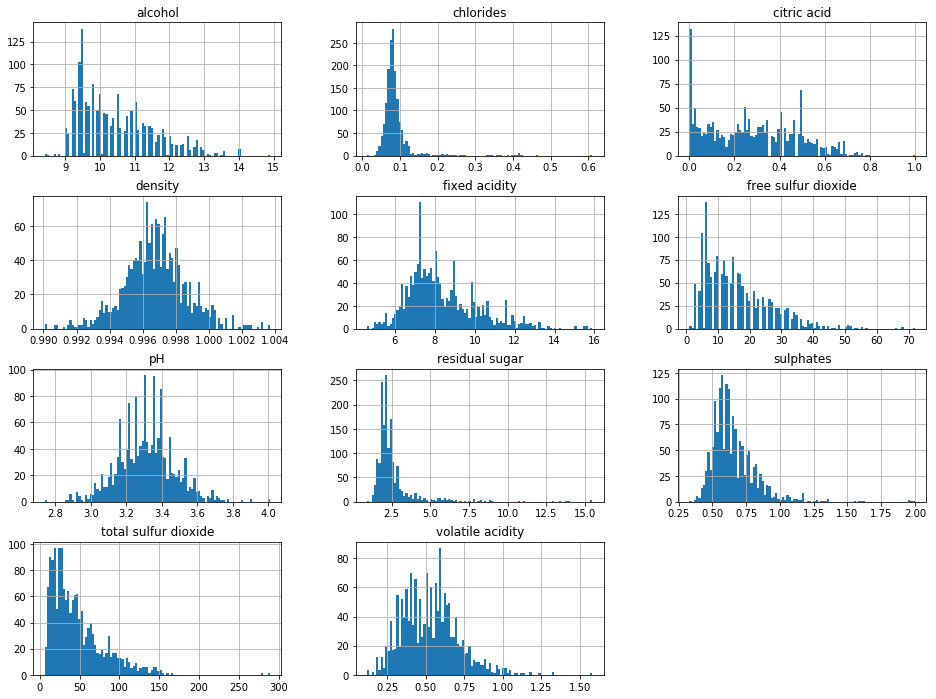

In [17]:
columns = ['alcohol', 'density', 'pH']
X.hist(figsize = (16, 12), bins = 100)
# 'figsize' rappresenta la dimensione delle figura (altezza, larghezza)
# mentre 'bins' la dimensione delle 'sbarrette'
plt.show()

In [6]:
# Conta i vini che hanno la stessa qualità
num_quality = dataset.groupby(['quality']).size()
# Si poteva anche fare come 
num_quality = dataset.groupby(['quality'])['quality'].count()
# La colonna 'quality' viene è casuale, si poteva inserire qualsiasi altra.
# La differenza tra 'count' e 'size' è che la prima non include i valori np.NaN mentre la seconda si
print(num_quality)

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


LR 0.5741 (0.07215)
RF 0.5453 (0.05811)
KNN 0.4453 (0.05554)
AB 0.506 (0.07507)
NB 0.5478 (0.03407)
DT 0.4628 (0.04879)


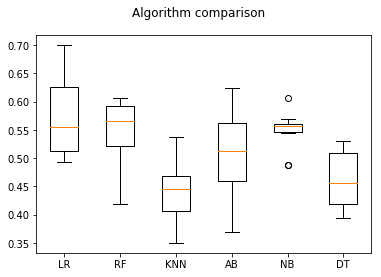

In [7]:
# prepare configuration for cross validation test harness
num_folds = 10

# Definisco una funzione 'cross_validation' perché mi servirà uguale dopo
def cross_validation(X, Y):
    # Prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('AB', AdaBoostClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('DT', DecisionTreeClassifier()))

    # Evaluate each model in turn
    results = []
    names = []
    seed = 120
    scoring = 'accuracy'
    for name, model in models:
        k_fold = KFold(num_folds, random_state = seed)
        cv_result = cross_val_score(model, X, Y, cv = k_fold, scoring = scoring)
        results.append(cv_result)
        names.append(name)
        msg = "{} {:0.4} ({:0.4})".format(name,cv_result.mean(), cv_result.std())
        print(msg)

    # Boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
cross_validation(X, Y)

LR 0.5666 (0.07523)
RF 0.5297 (0.05409)
KNN 0.5266 (0.05589)
AB 0.506 (0.07507)
NB 0.541 (0.0281)
DT 0.4759 (0.04629)


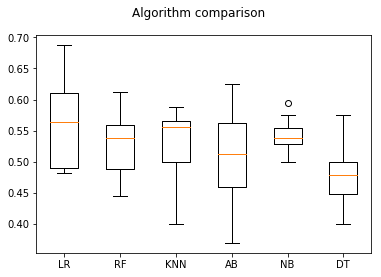

In [22]:
# Normalizzazione dei valori
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

cross_validation(rescaledX, Y)

LR 0.5772 (0.07031)
RF 0.5453 (0.0405)
KNN 0.464 (0.06268)
AB 0.506 (0.07507)
NB 0.5241 (0.0445)
DT 0.4621 (0.04863)


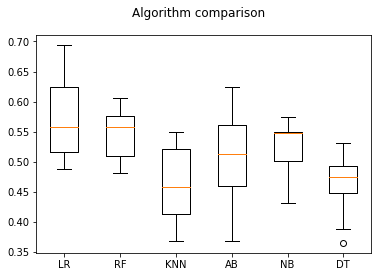

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,density chunks,prod acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8,1.40
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,6,1.76
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,6,1.52
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,8,0.56
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,8,1.40


In [24]:
# Creo una nuova colonna all'interno della quale metto i valori del densità (quella che ha più range di valori)
# in dieci clunks
X_new = X.copy()
num_chunks = 10
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]
X_new['density chunks'] = pd.qcut(X_new['density'], num_chunks, labels)
# Creo una nuova colonna con il prodotto delle acidità
X_new['prod acidity'] = X_new['fixed acidity'] * X_new['volatile acidity'] / X_new['fixed acidity'] + X_new['volatile acidity'] 
# Rimisuro l'accuracy
cross_validation(X_new, Y)
X_new.head()